#UTS Penambangan Data
Nama : Abdul Wachid Al Aziz
NIM  : 200411100103

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
uts = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")

In [62]:
uts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [63]:
uts.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [65]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score


#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [67]:
x_test

array([[ 21.47      ,  78.        ,   3.469     ,   0.6674356 ],
       [ 22.21      ,  86.        ,  36.94      ,   7.83620533],
       [ 24.21875   ,  86.        ,   3.73      ,   0.79125733],
       [ 25.9       ,  85.        ,   4.58      ,   0.96027333],
       [ 23.8       , 118.        ,   6.47      ,   1.88320133],
       [ 26.66666667, 201.        ,  41.611     ,  20.6307338 ],
       [ 30.8012487 ,  87.        ,  30.212     ,   6.4834952 ],
       [ 30.83653053, 128.        ,  41.894     ,  13.22733227],
       [ 33.18      ,  92.        ,   5.75      ,   1.30486667],
       [ 21.36752137,  78.        ,   2.64      ,   0.507936  ],
       [ 36.21227888, 101.        ,  15.533     ,   3.86978807],
       [ 23.12467037,  91.        ,   4.498     ,   1.00965107],
       [ 31.23140988, 131.        ,  30.13      ,   9.73600733],
       [ 32.27078777,  84.        ,   5.81      ,   1.203832  ],
       [ 32.5       ,  93.        ,   5.43      ,   1.245642  ],
       [ 29.296875  ,  98

In [68]:
x_test1 = x_test[1:2][0:]
x_test1

array([[22.21      , 86.        , 36.94      ,  7.83620533]])

In [69]:
y_test[1,]

1

Tree

In [70]:
uts.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [71]:
uts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [72]:
uts.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

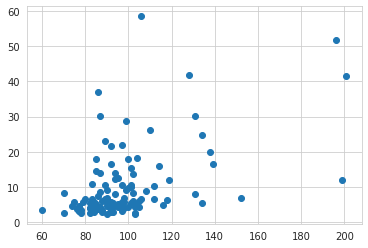

In [73]:
plt.scatter(uts['Glucose'],uts['Insulin'])
plt.show()

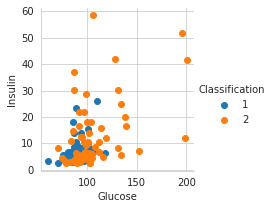

In [74]:
sns.set_style('whitegrid')
sns.FacetGrid(uts, hue = 'Classification') \
   .map(plt.scatter, 'Glucose','Insulin') \
   .add_legend()

plt.show()

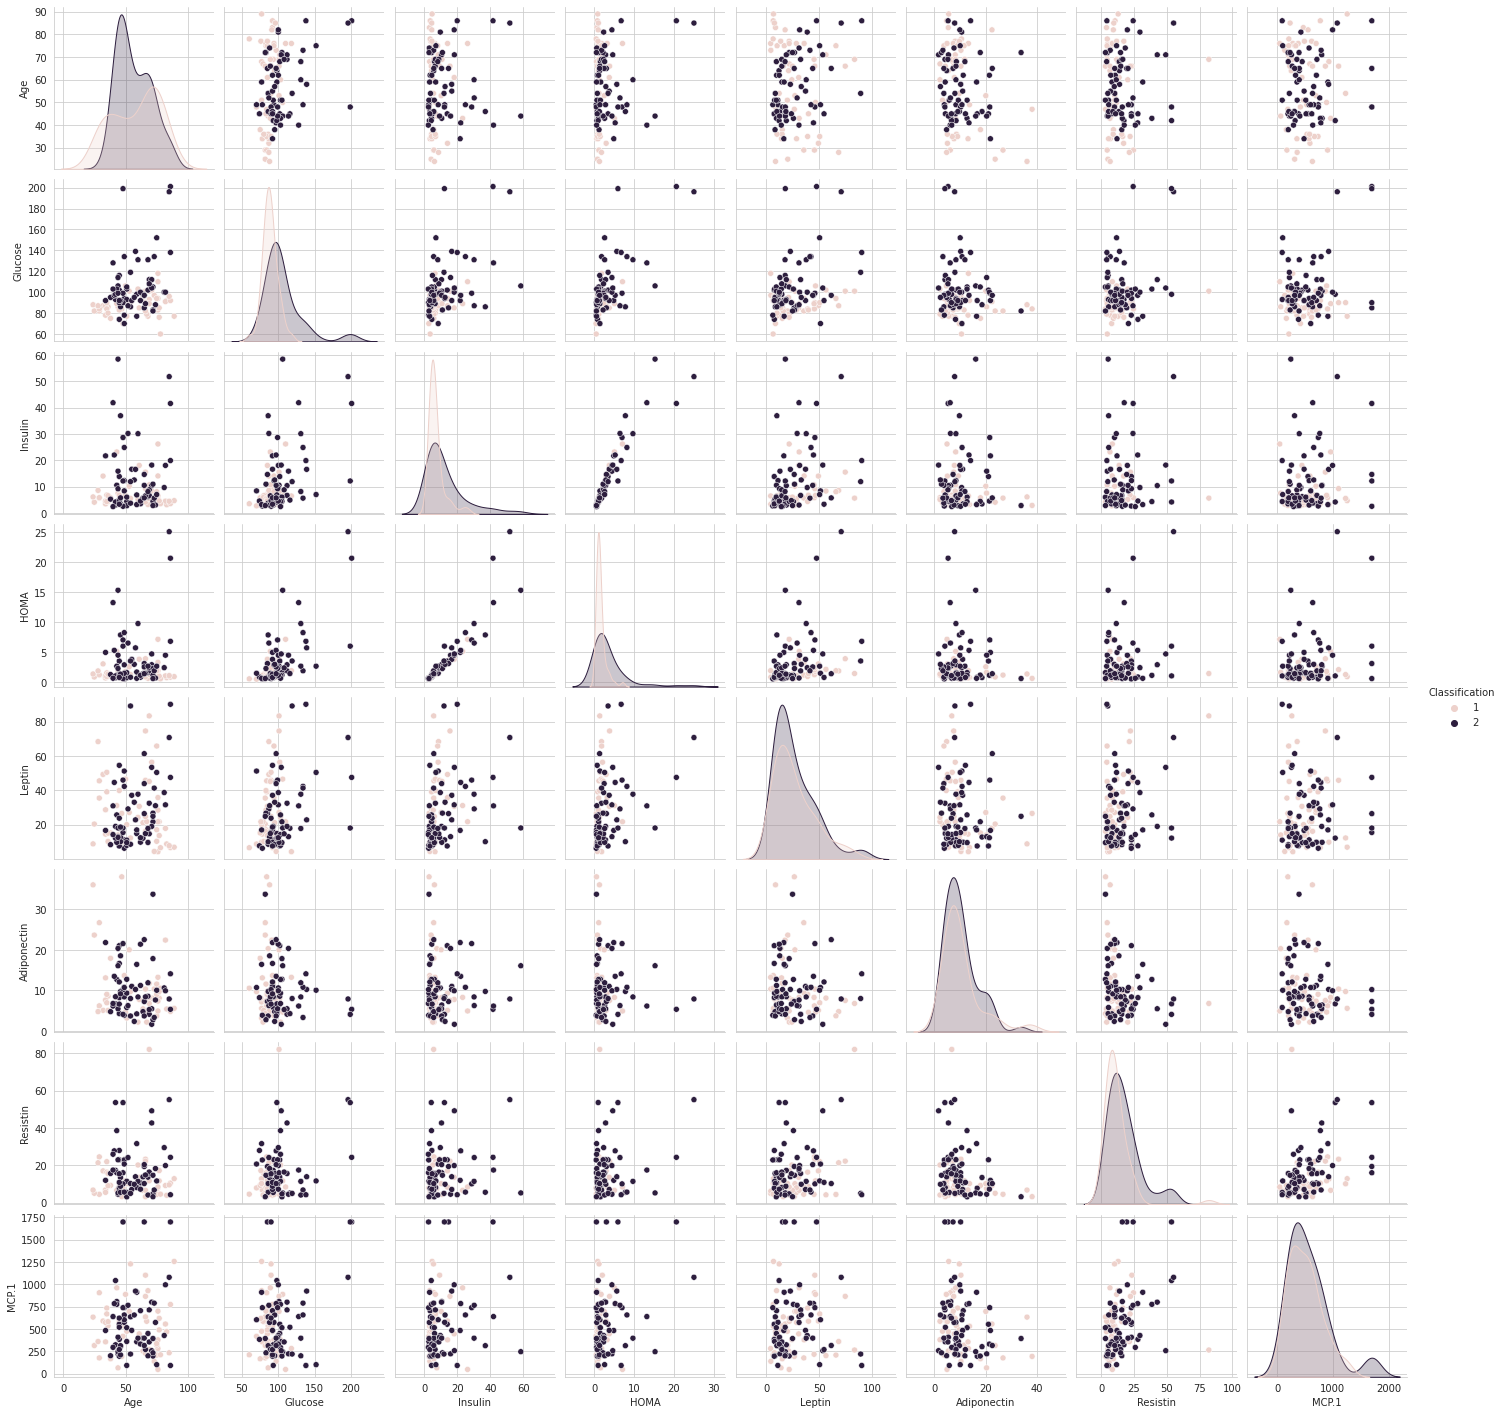

In [75]:
sns.pairplot(uts.drop(['BMI'],axis=1), hue='Classification')
plt.show()

[Text(0.5, 0.75, 'X[8] <= 1.5\ngini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]')]

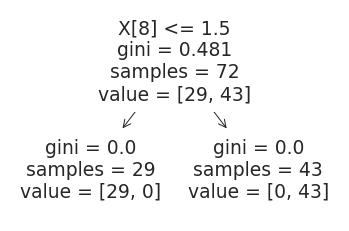

In [76]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''

X = uts[['BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']]
y = uts['Classification']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
iris_clf.fit(Xt, Yt)

tree.plot_tree(iris_clf)

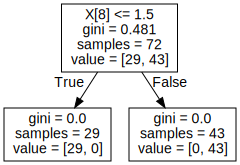

In [77]:
dot_data = tree.export_graphviz(iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [78]:
uts.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000
